### `torch.autograd`를 사용한 자동 미분
- 신경망을 학습할 때 가장 자주 사용되는 알고리즘 : Backpropagation
    - 매개변수는 주어진 매개변수에 대한 손실 함수의 변화도(gradient)에 따랒 ㅗ정됨
    - gradient를 계산하기 위해 PyTorch에는 `torch.autograd`라는 자동 미분 엔진 내장
    - 모든 계산 그래프에 대한 변화도의 자동 계산 지원

In [ ]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

#### Tensor, Function과 연산 그래프 (Computational Graph)
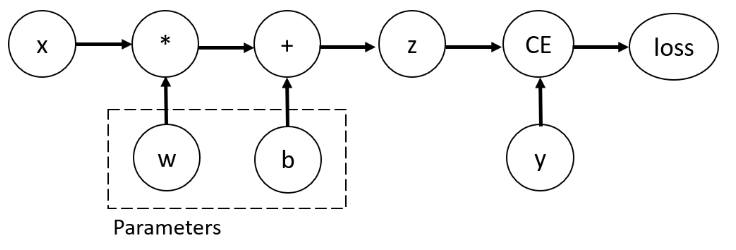

- 이 신경망에서 `w`와 `b`는 최적화를 해야 하는 `매개변수`
- 이러한 변수들에 대한 손실 함수의 변화도 계산 필요 -> 해당 텐서에 `requires_grad` 속성 설정
    - 나중에 `x.requires_grad_(True)` 메소드를 사용하여 설정도 가능

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x0000024F8D5F1060>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000024F8D5F0FA0>


#### Gradient 계산하기
- 신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivate)를 계산해야 함
- 즉, `x`와 `y`의 일부 고정값에서 $ \frac{\partial loss}{\partial w}$와 $ \frac{\partial loss}{\partial b}$가 필요
- 도함수를 계산하기 위해, `loss.backward()`를 호출한 다음 `w.grad`와 `b.grad`에서 값을 가져옴

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1796, 0.3103, 0.0763],
        [0.1796, 0.3103, 0.0763],
        [0.1796, 0.3103, 0.0763],
        [0.1796, 0.3103, 0.0763],
        [0.1796, 0.3103, 0.0763]])
tensor([0.1796, 0.3103, 0.0763])


#### 변화도 추적 멈추기
- 기본적으로 `requires_grad=True`인 모든 텐서들은 연산 기록을 추적하고 graidnet 계산 지원
- 모델을 학습한 뒤 단순히 input을 적용하기만 하는 경우 (forward 연산만 하는 경우) gradient 계산 필요 없음
- 위의 경우, 연산 코드를 `torch.no_grad()` 블록으로 둘러싸서 연산 추적을 멈출 수 있음

In [ ]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
    print(z.requires_grad)

True
False


In [ ]:
# 동일한 결과를 얻는 다른 방법 -> 텐서에 detach() 메소드 사용
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


변화도 추적을 멈춰야 하는 이유
- 신경망의 일부 매개변수를 고정된 매개변수(frozen parameter)로 표시
- 변화도를 추적하지 않는 텐서의 연산이 더 효율적 -> forward 단계만 수행할 때 연산 속도가 향상